<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/Jordan/get_results_and_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Response and Stimulus

In [1]:
from google.colab import drive
drive.mount('/content/drive')

#imports
!pip install hdf5storage
import hdf5storage 
import pandas as pd
import numpy as np
from scipy import ndimage
from tqdm import notebook
from more_itertools import sliced
import matplotlib.pyplot as plt
import h5py

Mounted at /content/drive
     |████████████████████████████████| 53 kB 1.0 MB/s 


In [2]:
#This file contains the response and stimulus data for all stacks of this movie
#The file is named using the first stack in the file, but it contains the other stacks, 
#like 210815_0_2_stim_mc_mix1_syt_, 210815_0_3_stim_mc_mix1_syt_, etc, as well

path = '/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Stimulus_Features/210815_0_1_stim_mc_mix1_syt_.mat'
#read file in using hdf5 structure
results_file = hdf5storage.loadmat(path)

In [3]:
#list the two main folders
list(results_file.keys())

['resp', 'stim1']

In [4]:
#the response and stimulus are now in a 1x(number of stacks) matrix
results_file['resp'].shape

(1, 11)

In [5]:
#each stack has a (# of rois) by (# of frames) matrix holding the fluorescence trace of the rois in that stack
for x in results_file['resp'][0]:
  print(x.shape)

(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 881)
(15, 3524)
(15, 5286)


In [6]:
#same for the stimulus values
for x in results_file['stim1'][0]:
  print(x.shape)

(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 5286)
(15, 881)
(15, 3524)
(15, 5286)


In [23]:
! ls drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Results

210815_0_10_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_1_label_mc_mix1_syt_.csv
210815_0_1_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_2_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_3_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_4_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_5_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_6_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_7_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_8_stackRaw_mc_mix1_syt_result_20220213T070259.h5
210815_0_9_stackRaw_mc_mix1_syt_result_20220213T070259.h5


Everything below this line needs to be reworked to run on the new format.

The spatial footprints are stored in the original 'results' folder that we need to path to, but the stimulus and response are stored together in the new format

Also need to use the filename, stack index, and roi index to create a unique identifier for each roi by stack

In [41]:
import os
root = 'drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Results/'
spatial_files = os.listdir(root)
spatial_files = [s for s in spatial_files if s[-3:] == '.h5']
spatial_files

['210815_0_1_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_2_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_3_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_4_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_5_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_6_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_7_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_8_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_9_stackRaw_mc_mix1_syt_result_20220213T070259.h5',
 '210815_0_10_stackRaw_mc_mix1_syt_result_20220213T070259.h5']

In [42]:
df = pd.DataFrame(columns=['stack','roi','spatial'])

In [43]:
hdf5storage.loadmat(root + spatial_files[0])#['spatial']

ValueError: ignored

In [ ]:
# stack of each roi's footprints - we'll use each of these
bwLabelStack = results_file['spatial']

bwLabelStack.shape

KeyError: ignored

In [15]:
results_file.keys()

dict_keys(['resp', 'stim1'])

In [ ]:
rois = 

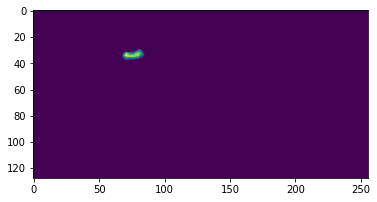

In [ ]:
#plot the first roi
dims = [128, 256]
#save to variable
spatial = bwLabelStack[0][:]
plt.imshow(np.reshape(spatial, dims, order="F"))

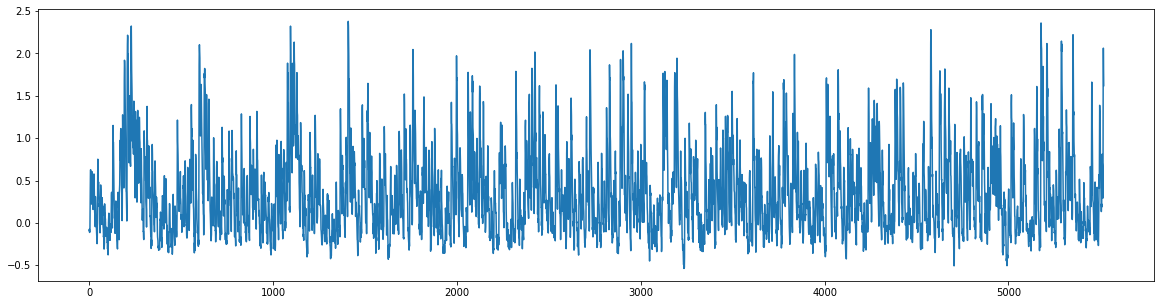

In [ ]:
#visualize temporal traces - first roi
temporal = results_file['temporal'][0]
plt.figure(figsize=(20,5))
plt.plot(temporal)

# Cell type labels

In [ ]:
import pandas as pd

label_csv = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Results/210815_0_1_label_mc_mix1_syt_.csv')
label_csv

,stack,index,label
0,210815_0_1_stackRaw_mc_mix1_syt_,0,tm2
1,210815_0_1_stackRaw_mc_mix1_syt_,1,tm2
2,210815_0_1_stackRaw_mc_mix1_syt_,2,tm4
3,210815_0_1_stackRaw_mc_mix1_syt_,3,tm2
4,210815_0_1_stackRaw_mc_mix1_syt_,4,tm2
5,210815_0_1_stackRaw_mc_mix1_syt_,5,tm9
6,210815_0_1_stackRaw_mc_mix1_syt_,6,tm1
7,210815_0_1_stackRaw_mc_mix1_syt_,7,tm4
8,210815_0_1_stackRaw_mc_mix1_syt_,8,tm4
9,210815_0_1_stackRaw_mc_mix1_syt_,9,tm2


# Stimulus Data read and exploration

In [ ]:
stimulus_file = h5py.File(stimulus_path, 'r')
stimulus_file['stimulus'].shape

(5519, 10)

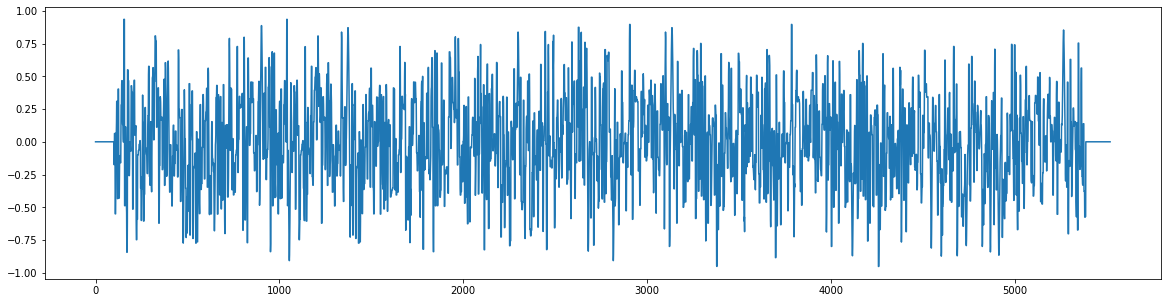

In [ ]:
#plot the stimulus for the first roi for the first 200 frames
#note that the matrix shape is flipped compared to the results matrices
#need to access index zero with [:,0] rather than [0]
plt.figure(figsize=(20,5))
plt.plot(stimulus_file['stimulus'][:][:,0])

# Extract features from each roi in the file

In [ ]:
#IMPORTANT
#Set the time period in frames that we want to consider here
#If 1, then we're doing no temporal collapsing, just taking the fluorescence / stimulus
#if >1, then we return the mean, min, max fluorescence over chunks of that length

temporal_period_length = 1

#every roi will have the same stack name, so declare it here
stack_name = results_file['stack_name'][()].decode("utf-8")

In [ ]:
#set up different dataframes depending on if we're collpsing temporal features or not
if temporal_period_length == 1:

  roi_features = pd.DataFrame(columns =['roi_ID',
                                      'area',
                                      'center_of_mass_row',
                                      'center_of_mass_column',
                                      'fluorescence',
                                      'stimulus_demo',
                                      'label'])
  
else:
  roi_features = pd.DataFrame(columns =['roi_ID',
                                    'area',
                                    'center_of_mass_row',
                                    'center_of_mass_column',
                                    'mean_fluorescence',
                                    'min_fluorescence',
                                    'max_fluorescence',
                                    'mean_stimulus_demo',
                                    'min_stimulus_demo',
                                    'max_stimulus_demo',
                                    'label'])
  
#loop through rois and extract features - these have not been validated to be calculated correctly
for x in notebook.tqdm(range(len(bwLabelStack))):

  spatial = bwLabelStack[x] #spatial footprint of the x'th roi
  temporal = results_file['temporal'][x] #temporal trace of the x'th roi
  stimulus = stimulus_file['stimulus'][:][:,x] #stimulus feature for the x'th roi
  label = label_csv['label'][x] #cell type label of the x'th roi
  roi_ID = stack_name + str(x) #comcatenated ID for the roi - date, fly index, stack index, mix, roi index

  #calculate spatial measures
  area = np.sum(spatial)
  dims = [128,256]
  spatial_img = np.reshape(spatial, dims, order="F")
  center_of_mass_row, center_of_mass_column = ndimage.center_of_mass(spatial_img)
  
  #If one sample is one frame, no temporal slicing necessary
  if temporal_period_length == 1:

    #to loop through all frames, swap the number for len(temporal)
    for frame in notebook.tqdm(range(len(temporal))):

      fluorescence = temporal[frame] #loop through frames
      stimulus_value = stimulus[frame] #and loop through stimulus

      roi_features = roi_features.append({'roi_ID': roi_ID,
                                          'area': area,
                                          'center_of_mass_row': center_of_mass_row,
                                          'center_of_mass_column': center_of_mass_column,
                                          'fluorescence': fluorescence,
                                          'stimulus_demo': stimulus_value,
                                          'label': label}, ignore_index=True)
      
  else:

    #list of lists containing the sliced up fluorescence values, one chunk has the length set in temporal_period_length
    temporal_slices = list(sliced(temporal, temporal_period_length))
    stimulus_slices = list(sliced(stimulus, temporal_period_length))

    #loop through slices and extract collapsed temporal features for each slice
    for temporal_slice in notebook.tqdm(range(len(temporal_slices))):

      if len(temporal_slices[temporal_slice]) == temporal_period_length:

        mean_fluorescence = np.mean(temporal_slices[temporal_slice]) #loop through frames
        min_fluorescence = np.min(temporal_slices[temporal_slice])
        max_fluorescence = np.max(temporal_slices[temporal_slice])

        mean_stimulus = np.mean(stimulus_slices[temporal_slice]) #loop through frames
        min_stimulus = np.min(stimulus_slices[temporal_slice])
        max_stimulus = np.max(stimulus_slices[temporal_slice])

        roi_features = roi_features.append({'roi_ID': roi_ID,
                                            'area': area,
                                            'center_of_mass_row': center_of_mass_row,
                                            'center_of_mass_column': center_of_mass_column,
                                            'mean_fluorescence': mean_fluorescence,
                                            'min_fluorescence': min_fluorescence,
                                            'max_fluorescence': max_fluorescence,
                                            'mean_stimulus_demo': mean_stimulus,
                                            'min_stimulus_demo': min_stimulus,
                                            'max_stimulus_demo': max_stimulus,
                                            'label': label}, ignore_index=True)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

  0%|          | 0/5519 [00:00<?, ?it/s]

In [ ]:
roi_features.sample(10)

,roi_ID,area,center_of_mass_row,center_of_mass_column,fluorescence,stimulus_demo,label
36150,210815_0_1_stackRaw_mc_mix1_syt_6,7.805018,81.613108,115.277042,0.000000,0.244414,tm1
13626,210815_0_1_stackRaw_mc_mix1_syt_2,6.962360,48.177407,86.375751,647.877110,-0.823850,tm4
49296,210815_0_1_stackRaw_mc_mix1_syt_8,9.403247,26.117532,80.910252,213.593131,0.610963,tm2
28349,210815_0_1_stackRaw_mc_mix1_syt_5,12.142288,74.400948,104.888285,5738.985839,0.102825,tm9
5902,210815_0_1_stackRaw_mc_mix1_syt_1,9.489691,40.312613,82.219801,337.941240,-0.520228,tm2
42236,210815_0_1_stackRaw_mc_mix1_syt_7,8.737703,51.133742,170.428963,259.570893,-0.101116,t5
46391,210815_0_1_stackRaw_mc_mix1_syt_8,9.403247,26.117532,80.910252,1230.321477,-0.041236,tm2
40988,210815_0_1_stackRaw_mc_mix1_syt_7,8.737703,51.133742,170.428963,0.000000,0.234200,t5
49231,210815_0_1_stackRaw_mc_mix1_syt_8,9.403247,26.117532,80.910252,22.499577,-0.266910,tm2
11233,210815_0_1_stackRaw_mc_mix1_syt_2,6.962360,48.177407,86.375751,0.000000,0.122551,tm4


In [ ]:
len(roi_features)

55190

In [ ]:
#close the .h5 files
results_file.close()
stimulus_file.close()

In [ ]:
#save the features - still needs validation
#manually set the filepath along with the number of frames in the window used
roi_features.to_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_1_label_mc_mix1_syt_features_1Frame_demo.csv')